## **09.이미지 연산**

### **이미지 연산**

In [1]:
# 이미지의 사칙 연산 (arithmatic.py)

import cv2
import numpy as np

# ---① 연산에 사용할 배열 생성
a = np.uint8([[200, 50]]) 
b = np.uint8([[100, 100]])

#---② NumPy 배열 직접 연산
add1 = a + b
sub1 = a - b
mult1 = a * 2
div1 = a / 3

# ---③ OpenCV API를 이용한 연산
add2 = cv2.add(a, b)
sub2 = cv2.subtract(a, b)
mult2 = cv2.multiply(a , 2)
div2 = cv2.divide(a, 3)

#---④ 각 연산 결과 출력
print(add1, add2)
print(sub1, sub2)
print(mult1, mult2)
print(div1, div2)

[[ 44 150]] [[255 150]]
[[100 206]] [[100   0]]
[[144 100]] [[255 100]]
[[66.66666667 16.66666667]] [[67 17]]


**cv2.add() 함수를 활용하면 255를 초과하는 모든 값은 255로 반환**  
**OpenCV에서는 0보다 작은 모든 값을 0으로 반환**

In [2]:
# mask와 누적 할당 연산 (arithmatic_mask.py)

import cv2
import numpy as np

#---① 연산에 사용할 배열 생성
a = np.array([[1, 2]], dtype=np.uint8)
b = np.array([[10, 20]], dtype=np.uint8)
#---② 2번째 요소가 0인 마스크 배열 생성 
mask = np.array([[1, 0]], dtype=np.uint8)

#---③ 누적 할당과의 비교 연산
c1 = cv2.add(a, b, None, mask)
print(c1)
c2 = cv2.add(a, b, b.copy(), mask)
print(c2, b)
c3 = cv2.add(a, b, b, mask)
print(c3, b)


[[11  0]]
[[11 20]] [[10 20]]
[[11 20]] [[11 20]]


### **이미지 합성**

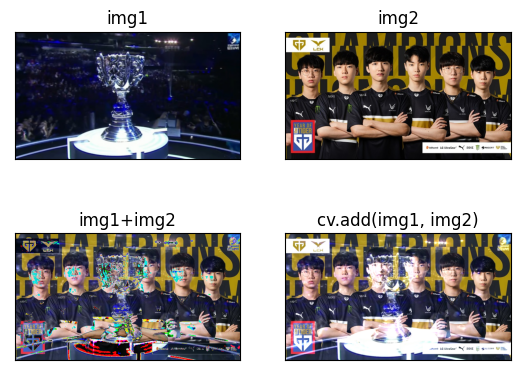

In [5]:
# 이미지 단순 합성 (blending_simple.py)

import cv2
import numpy as np
import matplotlib.pylab as plt

# ---① 연산에 사용할 이미지 읽기
img1 = cv2.imread('./asset/img/08_01.png')
img2 = cv2.imread('./asset/img/08_02.png')

# ---② 이미지 덧셈
img3 = img1 + img2  # 더하기 연산
img4 = cv2.add(img1, img2) # OpenCV 함수

imgs = {'img1':img1, 'img2':img2, 'img1+img2': img3, 'cv.add(img1, img2)': img4}

# ---③ 이미지 출력
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2, i + 1)
    plt.imshow(v[:,:,::-1])
    plt.title(k)
    plt.xticks([]); plt.yticks([])

plt.show()

In [6]:
# 알파 블렌딩 (blending_alpha.py)

import cv2
import numpy as np

alpha = 0.5 # 합성에 사용할 알파 값

#---① 합성에 사용할 영상 읽기
img1 = cv2.imread('./asset/img/08_01.png')
img2 = cv2.imread('./asset/img/08_02.png')

# ---② NumPy 배열에 수식을 직접 연산해서 알파 블렌딩 적용
blended = img1 * alpha + img2 * (1-alpha)
blended = blended.astype(np.uint8) # 소수점 발생을 제거하기 위함
cv2.imshow('img1 * alpha + img2 * (1-alpha)', blended)

# ---③ addWeighted() 함수로 알파 블렌딩 적용
dst = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0) 
cv2.imshow('cv2.addWeighted', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# 트랙바로 알파 블렌딩 (blending_alpha_trackbar.py)

import cv2
import numpy as np

win_name = 'Alpha blending'     # 창 이름
trackbar_name = 'fade'          # 트렉바 이름

# ---① 트렉바 이벤트 핸들러 함수
def onChange(x):
    alpha = x/100
    dst = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0) 
    cv2.imshow(win_name, dst)


# ---② 합성 영상 읽기
img1 = cv2.imread('./asset/img/08_01.png')
img2 = cv2.imread('./asset/img/08_02.png')

# ---③ 이미지 표시 및 트렉바 붙이기
cv2.imshow(win_name, img1)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)

cv2.waitKey()
cv2.destroyAllWindows()

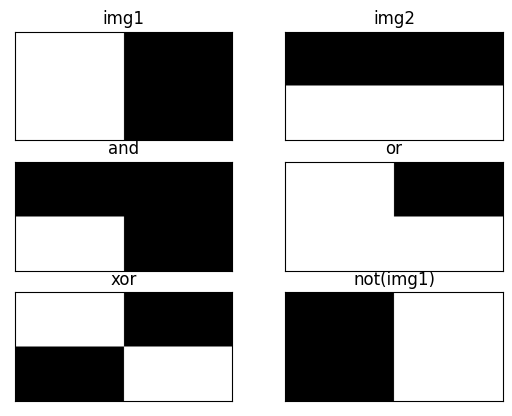

In [8]:
# 비트와이즈 연산 (bitwise.py)

import numpy as np, cv2
import matplotlib.pylab as plt

#--① 연산에 사용할 이미지 생성
img1 = np.zeros( ( 200,400), dtype=np.uint8)
img2 = np.zeros( ( 200,400), dtype=np.uint8)
img1[:, :200] = 255         # 왼쪽은 흰색(255), 오른쪽은 검정색(0)
img2[100:200, :] = 255      # 위쪽은 검정색(0), 아래쪽은 흰색(255)

#--② 비트와이즈 연산
bitAnd = cv2.bitwise_and(img1, img2)
bitOr = cv2.bitwise_or(img1, img2)
bitXor = cv2.bitwise_xor(img1, img2)
bitNot = cv2.bitwise_not(img1)

#--③ Plot으로 결과 출력
imgs = {'img1':img1, 'img2':img2, 'and':bitAnd, 
          'or':bitOr, 'xor':bitXor, 'not(img1)':bitNot}
for i, (title, img) in enumerate(imgs.items()):
    plt.subplot(3,2,i+1)
    plt.title(title)
    plt.imshow(img, 'gray')
    plt.xticks([]); plt.yticks([])

plt.show()

In [9]:
# bitwise_and 연산으로 마스킹하기 (bitwise_masking.py)

import numpy as np, cv2
import matplotlib.pylab as plt

#--① 이미지 읽기
img = cv2.imread('./asset/img/08_01.png')

#--② 마스크 만들기
mask = np.zeros_like(img)
cv2.circle(mask, (260,210), 100, (255,255,255), -1)
#cv2.circle(대상이미지, (원점x, 원점y), 반지름, (색상), 채우기)

#--③ 마스킹
masked = cv2.bitwise_and(img, mask)

#--④ 결과 출력
cv2.imshow('original', img)
cv2.imshow('mask', mask)
cv2.imshow('masked', masked)
cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
# 두 이미지의 차를 통해 도면의 차이 찾아내기 (diff_absolute.py)

import numpy as np, cv2

#--① 연산에 필요한 영상을 읽고 그레이스케일로 변환
img1 = cv2.imread('./asset/img/08_03.png')
img2 = cv2.imread('./asset/img/08_04.png')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#--② 두 영상의 절대값 차 연산
diff = cv2.absdiff(img1_gray, img2_gray)

#--③ 차 영상을 극대화 하기 위해 쓰레시홀드 처리 및 컬러로 변환
_, diff = cv2.threshold(diff, 1, 255, cv2.THRESH_BINARY)
diff_red = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)
diff_red[:,:,2] = 0

#--④ 두 번째 이미지에 변화 부분 표시
spot = cv2.bitwise_xor(img2, diff_red)

#--⑤ 결과 영상 출력
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('diff', diff)
cv2.imshow('spot', spot)
cv2.waitKey()
cv2.destroyAllWindows()

**이미지 합성과 마스킹**

In [15]:
# 투명 배경 PNG 파일을 이용한 합성 (addition_rgba_mask.py)

import cv2
import numpy as np

#--① 합성에 사용할 영상 읽기, 전경 영상은 4채널 png 파일
img_fg = cv2.imread('./asset/img/08_05.png', cv2.IMREAD_UNCHANGED)
img_bg = cv2.imread('./asset/img/08_02.png')

#--② 알파채널을 이용해서 마스크와 역마스크 생성
_, mask = cv2.threshold(img_fg[:,:,3], 1, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

#--③ 전경 영상 크기로 배경 영상에서 ROI 잘라내기
img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2BGR)
h, w = img_fg.shape[:2]
roi = img_bg[10:10+h, 10:10+w ]

#--④ 마스크 이용해서 오려내기
masked_fg = cv2.bitwise_and(img_fg, img_fg, mask=mask)
masked_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

#--⑥ 이미지 합성
added = masked_fg + masked_bg
img_bg[10:10+h, 10:10+w] = added

cv2.imshow('mask', mask)
cv2.imshow('mask_inv', mask_inv)
cv2.imshow('masked_fg', masked_fg)
cv2.imshow('masked_bg', masked_bg)
cv2.imshow('added', added)
cv2.imshow('result', img_bg)
cv2.waitKey()
cv2.destroyAllWindows()